In [1]:
!pip install -q shap

import pandas as pd
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI',
        'DiabetesPedigreeFunction','Age','Outcome']

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
df = pd.read_csv(url, names=cols)

print("Rows, Columns:", df.shape)
display(df.head())
print("\nOutcome value counts:")
print(df['Outcome'].value_counts())


Rows, Columns: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1



Outcome value counts:
Outcome
0    500
1    268
Name: count, dtype: int64


Accuracy:  0.75
Precision: 0.64
Recall:    0.67


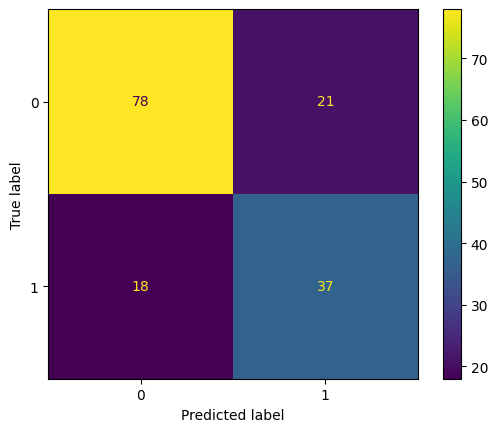

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1️⃣ Split data
X = df.drop('Outcome', axis=1)
y = df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2️⃣ Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# 3️⃣ Predictions
y_pred = model.predict(X_test)

# 4️⃣ Evaluate
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)

print(f"Accuracy:  {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall:    {rec:.2f}")

# 5️⃣ Visualize confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()
plt.show()


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7719 - loss: 0.5604 
Improved Test Accuracy: 0.77


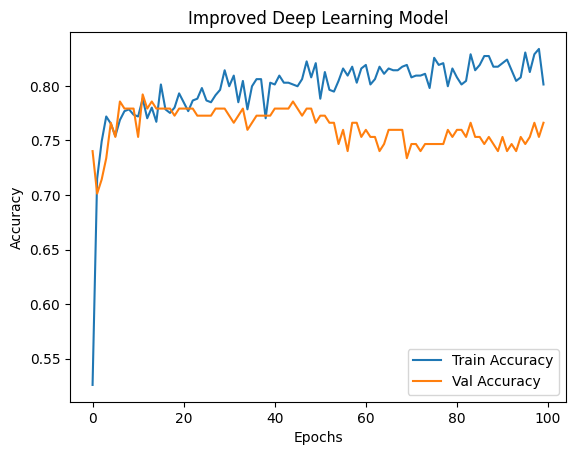

In [4]:
# Build improved model with Dropout and slightly larger layers
model_dl = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model_dl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model_dl.fit(
    X_train_scaled, y_train,
    validation_data=(X_test_scaled, y_test),
    epochs=100,
    batch_size=8,
    verbose=0
)

test_loss, test_acc = model_dl.evaluate(X_test_scaled, y_test)
print(f"Improved Test Accuracy: {test_acc:.2f}")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Improved Deep Learning Model')
plt.show()


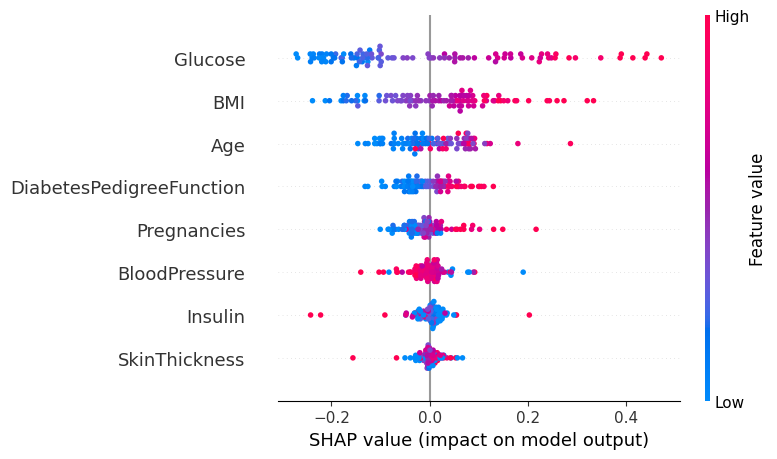

In [6]:
import shap
import numpy as np

# 1️⃣ Create SHAP explainer
explainer = shap.Explainer(model_dl, X_test_scaled)

# 2️⃣ Compute SHAP values for a subset (to save time)
shap_values = explainer(X_test_scaled[:100])

# 3️⃣ Summary plot — match subset length
shap.summary_plot(shap_values, X_test.iloc[:100], feature_names=X.columns)


In [11]:
import joblib

# Save the trained model
joblib.dump(model, "diabetes_model.pkl")

# Save the scaler (used for normalization)
joblib.dump(scaler, "scaler.pkl")

print("✅ Model and scaler saved successfully!")


✅ Model and scaler saved successfully!


In [12]:
import pandas as pd
import joblib

# Load saved model & scaler
model = joblib.load("diabetes_model.pkl")
scaler = joblib.load("scaler.pkl")

# Define feature names (same as training)
columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
           'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

# Create input as DataFrame
sample = pd.DataFrame([[6, 148, 72, 35, 0, 33.6, 0.627, 50]], columns=columns)

# Scale and predict
sample_scaled = scaler.transform(sample)
prediction = model.predict(sample_scaled)

result = "Diabetic" if prediction[0] == 1 else "Not Diabetic"
print("Predicted:", result)


Predicted: Not Diabetic


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
